# CVPR: Assignment 1 Bojana Počuča and Marco Nobile

### Imports:

In [1]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from scipy.linalg import null_space
from numpy import linalg 
from numpy import cross
%matplotlib inline


# Single View Geometry A: (10 pts) 
#### ● Taks1: <br>Estimate the transformation that maps points from the pitch layout S to this image I


Let's load the image I:

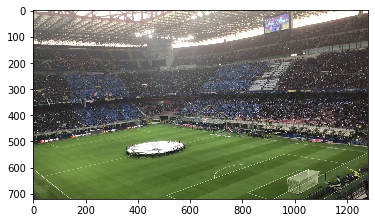

In [2]:
image_I = plt.imread('I.png')
plt.imshow(image_I)

Let's select all the possible points defined by line intersections in the image S (the raw pitch)

In [3]:
### POINTS FROM S: ###

# A,B,C,D: the 4 points that we are going to use to estimate the Homography H 
# the points are in the format [x,y,1]
A = np.array([576, 731, 1])
B = np.array([575, 52, 1])
C = np.array([935, 190, 1])
D = np.array([935, 593, 1])

#### all the other points #####
E = np.array([50, 50, 1])
F = np.array([50, 731, 1])
G = np.array([1100, 51, 1])
I = np.array([1101, 729, 1])
L = np.array([50, 189, 1])
M = np.array([50, 593, 1])
N = np.array([214, 189, 1])
O = np.array([215, 593, 1])
P = np.array([104, 299, 1])
Q = np.array([105, 484, 1])
R = np.array([1101, 190, 1])
S = np.array([1101, 593, 1])
T = np.array([1045, 300, 1])
U = np.array([1046, 483, 1])
V = np.array([51, 300, 1])
W = np.array([51, 483, 1])
J = np.array([1100, 301, 1])
Y = np.array([1100, 483, 1])

# Center of the circle on the half way line of the pitch:
Z = np.array([576, 391, 1])

In [4]:
def draw_line(point1,point2, options = 'r-'):
    
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    
    plt.plot(x_values, y_values)

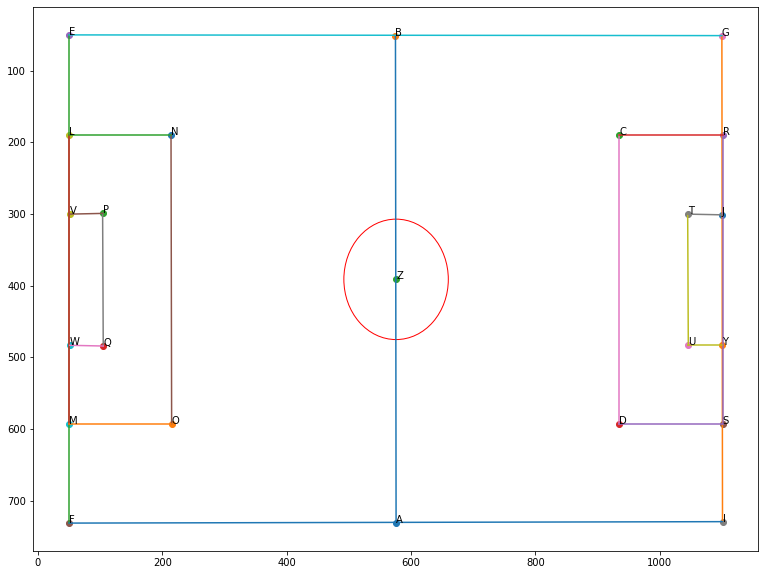

In [5]:
# Let's begin by plotting the original pitch:
fig, ax = plt.subplots(figsize=(13,10))

#vertical
draw_line(A,B)
draw_line(I,G)
draw_line(F,E)
draw_line(M,L)
draw_line(S,R)
draw_line(O,N)
draw_line(D,C)
draw_line(Q,P)
draw_line(U,T)

#horizontal

draw_line(E,G)
draw_line(F,I)
draw_line(M,O)
draw_line(L,N)
draw_line(C,R)
draw_line(D,S)
draw_line(V,P)
draw_line(W,Q)
draw_line(T,J)
draw_line(U,Y)

plt.annotate('A', A[:2])
plt.scatter(A[0], A[1])
plt.annotate('B', B[:2])
plt.scatter(B[0], B[1])
plt.annotate('C', C[:2])
plt.scatter(C[0], C[1])
plt.annotate('D', D[:2])
plt.scatter(D[0], D[1])
plt.annotate('E', E[:2])
plt.scatter(E[0], E[1])
plt.annotate('F', F[:2])
plt.scatter(F[0], F[1])
plt.annotate('G', G[:2])
plt.scatter(G[0], G[1])
plt.annotate('I', I[:2])
plt.scatter(I[0], I[1])
plt.annotate('L', L[:2])
plt.scatter(L[0], L[1])
plt.annotate('M', M[:2])
plt.scatter(M[0], M[1])
plt.annotate('N', N[:2])
plt.scatter(N[0], N[1])
plt.annotate('O', O[:2])
plt.scatter(O[0], O[1])
plt.annotate('P', P[:2])
plt.scatter(P[0], P[1])
plt.annotate('Q', Q[:2])
plt.scatter(Q[0], Q[1])
plt.annotate('R', R[:2])
plt.scatter(R[0], R[1])
plt.annotate('S', S[:2])
plt.scatter(S[0], S[1])
plt.annotate('U', U[:2])
plt.scatter(U[0], U[1])
plt.annotate('T', T[:2])
plt.scatter(T[0], T[1])
plt.annotate('V', V[:2])
plt.scatter(V[0], V[1])
plt.annotate('W', W[:2])
plt.scatter(W[0], W[1])
plt.annotate('J', J[:2])
plt.scatter(J[0], J[1])
plt.annotate('Y', Y[:2])
plt.scatter(Y[0], Y[1])
plt.annotate('Z', Z[:2],)
plt.scatter(Z[0], Z[1])

ax.invert_yaxis()

radius = 1050*0.08 #(this is HF LINE coords) ?? radius = 9.15 mt
circle = plt.Circle((576,391), radius, color = 'r', fill = False)
plt.gcf().gca().add_artist(circle)


Using the function circle.get_verts() we can retrieve 5 random points from the circle:

In [6]:
# 5 points random from the circle:
# circle.get_verts() # <= retrieves some points from the circle 

cir_1 = np.array([507.08455442, 413.76720495, 1])
cir_2 = np.array([442.74483889, 318.33451784, 1])
cir_3 = np.array([434.76633346, 392.74543154, 1])     
cir_4 = np.array([492.86650061, 302.29595034, 1])
cir_5 = np.array([477.39734031, 422.34333452, 1])
# save them into a list that we will use for Taks 2
list_points_circle = [cir_1, cir_2, cir_3, cir_4, cir_5]


In [7]:
# ***************
# # tocheck
# print(F)
# print(I)
# print(cross(I,F))
# # 1051 ?? NB HAD TO CHANGE H WITH I CUZ HOMOGRAPH AND POINT H CONTRAST
# ^^^^^^ CHECK circle.get_verts()
# NB RADIUS = 9.15

Let's now select the points A,B,C,D in image I such that we have 4 pairwise correspondecies:

In [8]:
### POINTS FROM I ###

A_p = np.array([37, 636, 1])
B_p = np.array([742, 474, 1])
C_p = np.array([965, 550, 1])
D_p = np.array([512, 709, 1])

In [9]:
# now we save the points into 2 lists that we cast them into np.arrays

pts_pitch = [A, B, C, D] # from img(S)
X = np.array(pts_pitch).T # from img(S)

pts_image = [A_p, B_p, C_p, D_p] # from img(I)
X_p = np.array(pts_image).T # from img(I)

# now we have: first row = x coord
#              second row = y coord
#              third row = z coord

print('X: points from S with col wise coords:')
print(X, 'shape:', X.shape)
print('\n')
print('X_p: points from I with col wise coords:')
print(X_p, 'shape', X_p.shape)

X: points from S with col wise coords:
[[576 575 935 935]
 [731  52 190 593]
 [  1   1   1   1]] shape: (3, 4)


X_p: points from I with col wise coords:
[[ 37 742 965 512]
 [636 474 550 709]
 [  1   1   1   1]] shape (3, 4)


Since we are working in $P^{2}$ the z coord = 1. <br>

Let's define the Homography H:
$$x' = Hx$$
where:
$$ 
H = \begin{bmatrix}
    A & \textbf{t} \\
    \textbf{$v^{T}$} & v 
    \end{bmatrix}
$$
with  𝒗 = [𝑣1; 𝑣2] and 𝑣 ∈ R (possibly zero), A rotation matrix and t translation vector.<br>

In our case we have that:
$$I = HS$$
and thus:
    - x' (x_p) -> points from the image I
    - x -> points from the image S
Given that the Homography H has 8 dof, we need 4 points correspondencies to estimate it via DLT: stacking 4 point correspondences in the correct form we obtian an 8 × 9 matrix:
$$A𝒉 = 𝟎$$
where A is the matrix obtained by applying and algebraic trick to move from the cross product to a linear matrix multiplication, that allows us to build an homogeneous system.

In [10]:
def build_matrix_A(X, X_p, preconditioning = False):
    A = None 
    
    for i in range(X.shape[1]): # 4: columwise - > for each point
        if preconditioning:
            term0 = np.zeros((1,3)) # 0^T
        else:
            term0 = np.zeros(3) # 0^T
        term1 = 1*X[:, i].T # Xp[2,i] = 1, X[:, i] it's a row:(3,)
        term2 = X_p[1,i]*X[:, i].T #
        term3 = X_p[0,i]*X[:, i].T #
#         print(term0, term1, term2, term3)
        first_row = np.hstack([term0, -term1, term2])
        second_row = np.hstack([term1, term0, -term3])
        matrix_A = np.vstack([first_row, second_row])

        if i == 0:
            A = matrix_A
        else:
            A = np.vstack([A, matrix_A])
    return A

In [11]:
A_ = build_matrix_A(X, X_p, preconditioning=False)
print(A_.shape)

(8, 9)


Once we have built the matrix A we can now use the SVD decomposition or the null_space function to retrieve H, where then H is the last column of 𝑉. Recalling that np.svd returns vh which is $V^{T}$ then we can build the following python function:

In [12]:
def estimate_homography(matrix_A):
    
    # h = null_space(matrix_A)
    u, s, vh  = np.linalg.svd(matrix_A)
    
    h = vh[-1, :].T # equal to  V = vh.T; V[:,-1]
    H = h.reshape((3,3))
    
    # check: A*h=0
    assert((matrix_A @ h).sum() < 1E-3)
    # check: ||h||=1
    assert((np.linalg.norm(h,2) - 1.0) < 1E-3)

    return H

In [13]:
H = estimate_homography(A_)
print('Homography H:')
print(np.around(H, decimals = 3)) # <= H
print('\n')
print('RNS solution: ', np.around(null_space(A_),3))

Homography H:
[[-0.     0.001 -0.745]
 [ 0.     0.    -0.667]
 [ 0.     0.    -0.002]]


RNS solution:  [[-0.   ]
 [ 0.001]
 [-0.745]
 [ 0.   ]
 [ 0.   ]
 [-0.667]
 [ 0.   ]
 [ 0.   ]
 [-0.002]]


Given that the result above is composed by numbers close to 0, we decided to apply precoditioning to have more numerical stability:

In [14]:
def preconditioning(X):
    t_x = np.mean(X[0,:])
    t_y = np.mean(X[1,:])
    s = (X.std(axis=1).mean())/np.sqrt(2)  
    matrix_T = np.matrix([[1/s, 0, -t_x/s], [0, 1/s, -t_y/s], [0, 0 ,1]])
    return matrix_T


Applying the preconditioning transformation to retrieve the normalized points coordinates:
$$𝑋𝑐=𝑇𝑋 \quad and \quad 𝑋′ =𝑇′𝑋′$$


In [15]:
# computing T:
T_preco = preconditioning(X)
T_p_preco = preconditioning(X_p)

# applying preconditioning:
X = T_preco @ X
X_p = T_p_preco @ X_p

# retrieve H with the new data:
A_ = build_matrix_A(X, X_p, preconditioning=True)
print(A_.shape)
H = estimate_homography(A_)
print('Homography H:')
print(np.around(H, decimals = 3)) # <= H
print('\n')
print('RNS solution: ', np.around(null_space(A_),3))


(8, 9)
Homography H:
[[ 0.471 -0.62   0.18 ]
 [ 0.133  0.175 -0.118]
 [-0.052 -0.044  0.543]]


RNS solution:  [[ 0.471]
 [-0.62 ]
 [ 0.18 ]
 [ 0.133]
 [ 0.175]
 [-0.118]
 [-0.052]
 [-0.044]
 [ 0.543]]


Since we are now working with preconditioned data, we need to define the transformation as:
$$
𝐻 =𝑇′^{-1}𝐻𝑇
$$

In [16]:
H = np.linalg.inv(T_p_preco) @ H @ T_preco

Here above we can see the estmated H for the Homography. With this results we are now able to apply the retrieved H to apply the projective trasformation to the points of S. Let's apply H to find the new coords of the pitch onto the image plane of I:

In [17]:
# New points
E_new = np.array(H@E).ravel()
L_new = np.array(H@L).ravel()
V_new = np.array(H@V).ravel()
W_new = np.array(H@W).ravel()
M_new = np.array(H@M).ravel()
F_new = np.array(H@F).ravel()
N_new = np.array(H@N).ravel()
O_new = np.array(H@O).ravel()
P_new = np.array(H@P).ravel()
Q_new = np.array(H@Q).ravel()
A_new = np.array(H@A).ravel()
B_new = np.array(H@B).ravel()
G_new = np.array(H@G).ravel()
C_new = np.array(H@C).ravel()
R_new = np.array(H@R).ravel()
J_new = np.array(H@J).ravel()
T_new = np.array(H@T).ravel()
U_new = np.array(H@U).ravel()
Y_new = np.array(H@Y).ravel()
D_new = np.array(H@D).ravel()
S_new = np.array(H@S).ravel()
I_new = np.array(H@I).ravel()

# Normalizing
E_new = E_new/E_new[2]
L_new = L_new/L_new[2]
V_new = V_new/V_new[2]
W_new = W_new/W_new[2]
M_new = M_new/M_new[2]
F_new = F_new/F_new[2]
N_new = N_new/N_new[2]
O_new = O_new/O_new[2]
P_new = P_new/P_new[2]
Q_new = Q_new/Q_new[2]
A_new = A_new/A_new[2]
B_new = B_new/B_new[2]
G_new = G_new/G_new[2]
C_new = C_new/C_new[2]
R_new = R_new/R_new[2]
J_new = J_new/J_new[2]
T_new = T_new/T_new[2]
U_new = U_new/U_new[2]
Y_new = Y_new/Y_new[2]
D_new = D_new/D_new[2]
S_new = S_new/S_new[2]
I_new = I_new/I_new[2]

#### ● Taks2: <br>Apply  H to map all the line segments of the pitch layout S over the image I visualizing all the line segments even in regions that are not depicted in the image I.

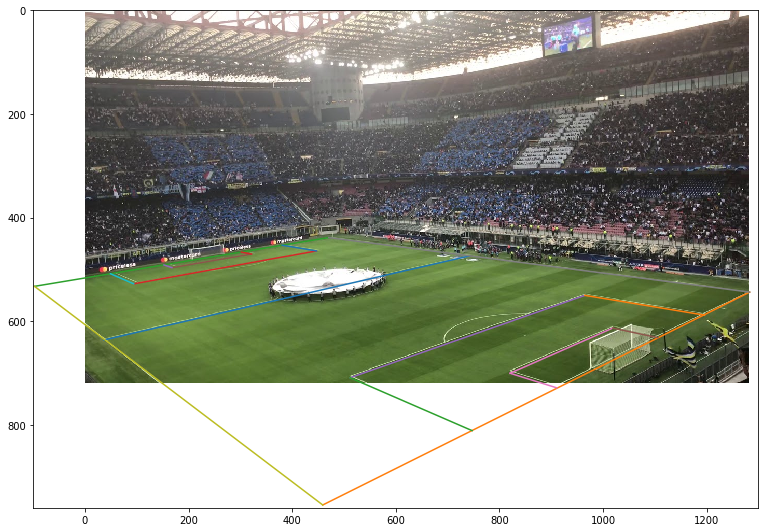

In [18]:
# and now we project S onto I:
#vertical
fig, ax = plt.subplots(figsize=(13,10))
draw_line(A_new,B_new)
draw_line(I_new,G_new)
draw_line(F_new,E_new)
# draw_line(M_new,L_new)
# draw_line(S_new,R_new)
draw_line(O_new,N_new)
draw_line(D_new,C_new)
draw_line(Q_new,P_new)
draw_line(U_new,T_new)

#horizontal

draw_line(E_new,G_new)
draw_line(F_new,I_new)
draw_line(M_new,O_new)
draw_line(L_new,N_new)
draw_line(C_new,R_new)
draw_line(D_new,S_new)
draw_line(V_new,P_new)
draw_line(W_new,Q_new)
draw_line(T_new,J_new)
draw_line(U_new,Y_new)
ax.set_xlim([-100, 1300])
ax.set_ylim([0, 960])
ax.invert_yaxis()

# Overlaying lines (from corresponding points)
# draw_line(A,B, 'b-')
# draw_line(C,D, 'b-')

plt.imshow(image_I)

#### ● Taks3: <br> Define the centre circle ​C i​ n the layout and map it to the image.

In [19]:
Z_new = np.array(H@Z).ravel()
Z_new = Z_new/Z_new[2]
Z_new

array([467.2283078 , 537.29035945,   1.        ])

In [20]:
def C_estimation(points_circle):
    # list_ = list of 5 np.arrays 1 for each point
    matrix_A = np.zeros((points_circle.shape[1],6))
    for col_idx in range(points_circle.shape[1]):
        row = np.array([points_circle[0,col_idx]**2,
                    points_circle[0,col_idx]*points_circle[1,col_idx],
                    points_circle[1,col_idx]**2,
                    points_circle[0,col_idx],
                    points_circle[1,col_idx],
                    1])  
        matrix_A[col_idx,:] = row
    return matrix_A


In [21]:
# cast to np.array with x,y,z row-wise
points_circle = np.array(list_points_circle).T
# find A for Ac=0
matrix_A_conic = C_estimation(points_circle)
matrix_A_conic.shape

(5, 6)

In [22]:
c = null_space(matrix_A_conic)
np.around(c, decimals = 3) # c column vector of coeffs in Ac=0


array([[ 0.   ],
       [ 0.   ],
       [ 0.   ],
       [-0.003],
       [-0.002],
       [ 1.   ]])

As we can see once again we have different values that are equal to 0, thus we apply preconditioning to achieve a better solution from the numerical point of view:

In [23]:
# apply preco
T_preco_1 = preconditioning(points_circle)
points_circle = T_preco_1 @ points_circle

In [24]:
matrix_A_conic = C_estimation(points_circle)
c = null_space(matrix_A_conic)
np.around(c, decimals = 3) # c column vector of coeffs in Ac=0


array([[-0.124],
       [-0.   ],
       [-0.093],
       [ 0.123],
       [-0.086],
       [ 0.976]])

And now we can arrange the coefficients retrieved above to find the matrix C:
$$
C = \begin{bmatrix}
    a & b/2 & d/2\\
    b/2 & c & e/2\\
    d/2 & e/2 & f
    \end{bmatrix}
$$

In [25]:
C_ = np.array([[c[0], c[1]/2, c[3]/2] ,
              [c[1]/2, c[2], c[4]/2], 
              [c[3]/2, c[4]/2 ,c[5]]])

C_ = np.squeeze(C_, axis=2)
print('C:')
print(np.around(C_, decimals = 5))
print('\n')
print('Sanity check with incidence relation: x.T @ C @ X = 0')
print('\n')
print('For point 1:', np.around(points_circle[:,0].T@ C_ @ points_circle[:,0], decimals = 3))
print('For point 2:', np.around(points_circle[:,1].T@ C_ @ points_circle[:,1], decimals = 3))
print('For point 3:', np.around(points_circle[:,2].T@ C_ @ points_circle[:,2], decimals = 3))
print('For point 4:', np.around(points_circle[:,3].T@ C_ @ points_circle[:,3], decimals = 3))
print('For point 5:', np.around(points_circle[:,4].T@ C_ @ points_circle[:,4], decimals = 3))


C:
[[-1.2444e-01 -4.0000e-05  6.1350e-02]
 [-4.0000e-05 -9.3060e-02 -4.2840e-02]
 [ 6.1350e-02 -4.2840e-02  9.7645e-01]]


Sanity check with incidence relation: x.T @ C @ X = 0


For point 1: [[0.]]
For point 2: [[0.]]
For point 3: [[-0.]]
For point 4: [[-0.]]
For point 5: [[0.]]


DRAW THE CONIC:

In [26]:
# def axes():
#     plt.axhline(0, alpha=.1)
#     plt.axvline(0, alpha=.1)
    
# a = c[0].item()
# b = c[1].item()
# x = np.linspace(-10000, 10000, 400)
# y = np.linspace(-100000, 10000, 400)
# x, y = np.meshgrid(x, y)
# axes()
# # [467.2283078 , 537.29035945
# plt.contour(x, y,((x-467.2283078)**2/a**2 + (y-537.29035945)**2/b**2), [1], colors='k')

# plt.imshow(image_I)
# plt.show()


# import matplotlib.pyplot as plt
# from math import pi, cos, sin
# from random import random

# def point(h, k, r):
#     theta = random() * 2 * pi
#     return h + cos(theta) * r, k + sin(theta) * r

# xy = [point(1,2,1) for _ in range(30)]

# plt.scatter(*zip(*xy))
# plt.grid(color='k', linestyle=':', linewidth=1)
# plt.axes().set_aspect('equal', 'datalim')
# plt.show()

#### ● Taks4: <br>Look for another picture ​J ​of Stadio Meazza (possibly partially occluded), and repeat the whole
process. Briefly comment the results (e.g. whether it works better or does not work as for the provided image)

In [27]:
# TODO

# Single View Geometry B: (3 pts)


#### Task: Now we need to find H using line correspondences.
To begin with we need to select 4 pairs of lines, between the corresponding images. Given that we already had ABCD from both the inital images we can compute: 

In [28]:
# let's re write the selected points for task 1:
### POINTS FROM S: ###
A = np.array([576, 731, 1])
B = np.array([575, 52, 1])
C = np.array([935, 190, 1])
D = np.array([935, 593, 1])
### POINTS FROM I ###
A_p = np.array([37, 636, 1])
B_p = np.array([742, 474, 1])
C_p = np.array([965, 550, 1])
D_p = np.array([512, 709, 1])

#let's find the lines in S
AD_pitch = cross(A,D)/cross(A,D)[2]
AB_pitch = cross(A,B)/cross(A,B)[2]
BC_pitch =  cross(B,C)/cross(B,C)[2]
CD_pitch =  cross(C,D)/cross(C,D)[2]

# and let's find the lines in I
AD_im = cross(A_p,D_p)/cross(A_p,D_p)[2]
AB_im = cross(A_p,B_p)/cross(A_p,B_p)[2]
BC_im = cross(B_p,C_p)/cross(B_p,C_p)[2]
CD_im = cross(C_p,D_p)/cross(C_p,D_p)[2]


In [29]:
# once again let's save them in 2 lists and cast them to np.arrays 
# with the usual format [x,y,z].T
lines_pitch = [AD_pitch, AB_pitch, BC_pitch, CD_pitch]
lines_s = np.array(lines_pitch).T

lines_im = [AD_im, AB_im, BC_im, CD_im]
lines_p = np.array(lines_im).T


And now we build the matrix A on which we can use the DLT algorithm as following:<br>
$$ 
A_i = \begin{bmatrix}
    -u & 0 & ux & -v & 0 & vx & -1 & 0 & x \\
    0 & -u & uy & 0 & -v & vy & 0 & -1 & y 
    \end{bmatrix}
$$
<br>
where: $𝐥_𝑖=(𝑢,𝑣,1)^{T}$ and $𝐥^{′}_{𝑖}=(𝑥,𝑦,1)^{𝑇}$. For each pair of line we have 2 equations and thus, we can again use the SVD decomposition to find the vector $h$ s.t. 
$$Ah=0$$


In [30]:
def build_A_lines(lines_p, lines_s):    
    '''As we can see the function takes as input only lines coeffs'''
    A = None
    for i in range(lines_p.shape[1]):
        u = lines_p[0,i]
        v = lines_p[1,i]
        x = lines_s[0,i] 
        y = lines_s[1,i]
        res = np.array([[-u, 0, u*x, -v, 0, v*x, -1, 0, x],
                 [0, -u, u*y, 0, -v, v*y, 0, -1, y]])
        if i == 0:
            A = res
        else:
            A = np.vstack([A, res])
    return A
 

In [31]:
# with the above function we retrieve the matrix A of shape: (8, 9)
A_task_b = build_A_lines(lines_p, lines_s)
print('A shape:', A_task_b.shape, ' =>8 dof and 8 equations, we can solve the system')
# and now we estimate the homography we the newly defined A (gathered only using lines)
H_task_b = estimate_homography(A_task_b)
print(f'Homography H: a {H_task_b.shape} invertible non-singular matrix')


A shape: (8, 9)  =>8 dof and 8 equations, we can solve the system
Homography H: a (3, 3) invertible non-singular matrix


In [32]:
# https://dsp.stackexchange.com/questions/6112/calculating-a-homography-based-on-detected-lines
# [[-u, 0, u*x, -v, 0, v*x, -1, 0, x],
#  [0, -u, u*y, 0, -v, v*y, 0, -1, y]]

We can now indeed use the new matrix to reproduce the same result obtained above:

In [33]:
# New points, note H_task_b instead of H
E_new = np.array(H_task_b@E).ravel()
L_new = np.array(H_task_b@L).ravel()
V_new = np.array(H_task_b@V).ravel()
W_new = np.array(H_task_b@W).ravel()
M_new = np.array(H_task_b@M).ravel()
F_new = np.array(H_task_b@F).ravel()
N_new = np.array(H_task_b@N).ravel()
O_new = np.array(H_task_b@O).ravel()
P_new = np.array(H_task_b@P).ravel()
Q_new = np.array(H_task_b@Q).ravel()
A_new = np.array(H_task_b@A).ravel()
B_new = np.array(H_task_b@B).ravel()
G_new = np.array(H_task_b@G).ravel()
C_new = np.array(H_task_b@C).ravel()
R_new = np.array(H_task_b@R).ravel()
J_new = np.array(H_task_b@J).ravel()
T_new = np.array(H_task_b@T).ravel()
U_new = np.array(H_task_b@U).ravel()
Y_new = np.array(H_task_b@Y).ravel()
D_new = np.array(H_task_b@D).ravel()
S_new = np.array(H_task_b@S).ravel()
I_new = np.array(H_task_b@I).ravel()

# Normalizing
E_new = E_new/E_new[2]
L_new = L_new/L_new[2]
V_new = V_new/V_new[2]
W_new = W_new/W_new[2]
M_new = M_new/M_new[2]
F_new = F_new/F_new[2]
N_new = N_new/N_new[2]
O_new = O_new/O_new[2]
P_new = P_new/P_new[2]
Q_new = Q_new/Q_new[2]
A_new = A_new/A_new[2]
B_new = B_new/B_new[2]
G_new = G_new/G_new[2]
C_new = C_new/C_new[2]
R_new = R_new/R_new[2]
J_new = J_new/J_new[2]
T_new = T_new/T_new[2]
U_new = U_new/U_new[2]
Y_new = Y_new/Y_new[2]
D_new = D_new/D_new[2]
S_new = S_new/S_new[2]
I_new = I_new/I_new[2]

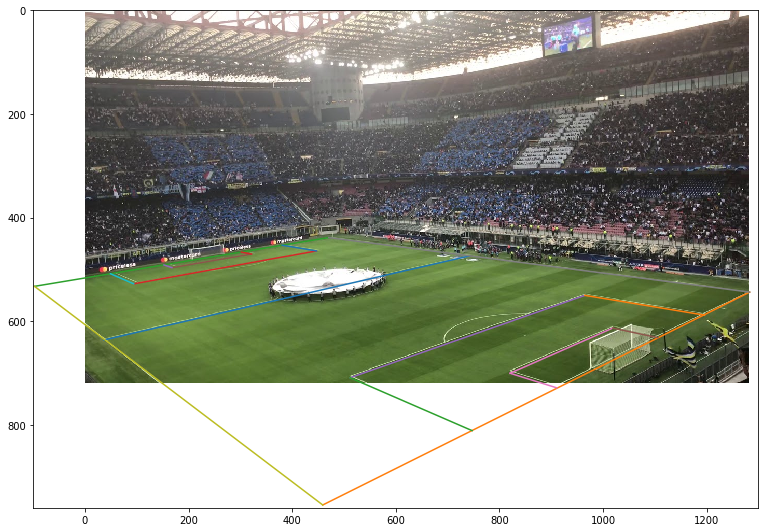

In [34]:
# and now we project S onto I:
#vertical
fig, ax = plt.subplots(figsize=(13,10))
draw_line(A_new,B_new)
draw_line(I_new,G_new)
draw_line(F_new,E_new)
# draw_line(M_new,L_new)
# draw_line(S_new,R_new)
draw_line(O_new,N_new)
draw_line(D_new,C_new)
draw_line(Q_new,P_new)
draw_line(U_new,T_new)

#horizontal

draw_line(E_new,G_new)
draw_line(F_new,I_new)
draw_line(M_new,O_new)
draw_line(L_new,N_new)
draw_line(C_new,R_new)
draw_line(D_new,S_new)
draw_line(V_new,P_new)
draw_line(W_new,Q_new)
draw_line(T_new,J_new)
draw_line(U_new,Y_new)
ax.set_xlim([-100, 1300])
ax.set_ylim([0, 960])
ax.invert_yaxis()

# Overlaying lines (from corresponding points)
# draw_line(A,B, 'b-')
# draw_line(C,D, 'b-')

plt.imshow(image_I)

# Bonus Question: dual conic to circular points (4 pts)

In [35]:
# TODO

# Single View Geometry C: (5 pts + 1 bonus)

In [36]:
# TODO